# Gradient Descent from Scratch in Python

<img src="images/11/gdsc.png" />

## Importing the necessary packages

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

## Linear Equation as Matrix Multiplication

We can calculate the predictions of a linear equation $\vec{y_{pred}}$ as the matrix multiplication between a vector $\vec{x_{}}$ and a matrix $A$ as shown in the equation: 
### $$\vec{y_{pred}}=\vec{x_{}}A$$

<img src="images/11/matmul.png" />

In [2]:
# Matrix multiplication
x1 = 2
x0 = 1
a1 = 3
a0 = 4

x = [x1, x0]
A = [[a1], [a0]]

y_pred = np.matmul(x, A)
print(y_pred)

[10]


## Mean Squared Error Loss

We can calculate the MSE Loss as the average squared error between two vectors $\vec{y_{true}}$ and $\vec{y_{pred}}$. $n$ is the number of items in either $\vec{y_{true}}$ or $\vec{y_{pred}}$

### $$MSE=\frac{\sum{(\vec{y_{true}}-\vec{y_{pred}})^{2}}}{n}$$

In [3]:
# Mean Squared Error
y_true = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_pred = np.array([5, 25, 25, 45, 45, 65, 65, 85, 85, 105])

mse = np.mean((y_true - y_pred)**2)
print(mse)

25.0


## Gradient: Partial Derivative of MSE

The Partial Derivatives of MSE with respect to each of the two parameters in the parameter matrix $A$ is defined as

#### $$\frac{\partial MSE}{\partial a_{1}}=\frac{\sum{-2\vec{x_{1}}(\vec{y_{true}}-\vec{y_{pred}})}}{n}$$
#### $$\frac{\partial MSE}{\partial a_{0}}=\frac{\sum{-2\vec{x_{0}}(\vec{y_{true}}-\vec{y_{pred}})}}{n}$$

Where, $\vec{y_{pred}}=\vec{x_{}}A=\vec{x_{1}}a_{1}+\vec{x_{0}}a_{0}$

In [4]:
# MSE Partial Derivatives
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
x0 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

y_true = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_pred = np.array([5, 25, 25, 45, 45, 65, 65, 85, 85, 105])

pd_a1 = np.mean(-2*x1*(y_true - y_pred))
pd_a0 = np.mean(-2*x0*(y_true - y_pred))

print(pd_a1, pd_a0)

5.0 0.0


## Descent: Updating the parameters in the direction of lowering the Loss

We find the new values of the parameters by subtracting the product of the learning rate $\eta$ and the Partial Derivatives of MSE from the previous values of the parameters.

#### $$a_1=a_1-\eta\frac{\partial MSE}{\partial a_{1}}$$
#### $$a_0=a_0-\eta\frac{\partial MSE}{\partial a_{0}}$$

In [5]:
lr = 0.01

a1 = a1 - lr*pd_a1
a0 = a0 - lr*pd_a0

print(a1, a0)

2.95 4.0


# Putting everything together

## Importing the necessary packages

In [6]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

## Optional: Create some data for x and y

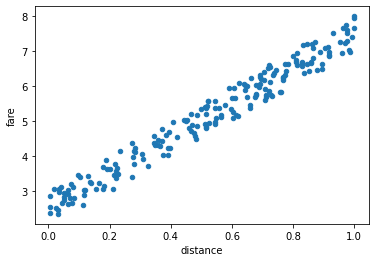

In [7]:
# Prepare a dummy linear correlation of 200 data points. In reality you will already have data for both x and y
num_data = 200

# Inputs
x = np.ones((num_data, 2)) # x0
x[:,1] = random.random(num_data) # x1

# Actual value of the Parameters
a = [2, 5] # [a0, a1]

# Outputs
y_true = np.matmul(x, a) + random.random(num_data)

# DataFrame
true_df = pd.DataFrame({'intercept': x[:,0], 'distance':x[:,1], 'fare': y_true})
true_df.plot(x='distance', y='fare', kind='scatter')
true_df.to_csv('../data/taxi_fare.csv', index=False)

## Load the dataset into Pandas DataFrame

In [8]:
taxi_fare_data = pd.read_csv('../data/taxi_fare.csv')

# View the first 5 rows in the dataframe
taxi_fare_data.head()

,intercept,distance,fare
0,1.0,0.878130,6.439778
1,1.0,0.278522,4.121839
2,1.0,0.895906,6.627702
3,1.0,0.095970,3.449995
4,1.0,0.976896,7.580175


In [9]:
# Access a single column in the dataframe
distance = taxi_fare_data['fare']
print(distance)

0      6.439778
1      4.121839
2      6.627702
3      3.449995
4      7.580175
         ...   
195    3.118416
196    6.370674
197    5.074930
198    6.682675
199    5.700285
Name: fare, Length: 200, dtype: float64


In [10]:
# Access a multiple columns in the dataframe
intercept_and_distance = taxi_fare_data[['intercept', 'distance']]
print(intercept_and_distance)

     intercept  distance
0          1.0  0.878130
1          1.0  0.278522
2          1.0  0.895906
3          1.0  0.095970
4          1.0  0.976896
..         ...       ...
195        1.0  0.080232
196        1.0  0.836706
197        1.0  0.548511
198        1.0  0.809486
199        1.0  0.729624

[200 rows x 2 columns]


In [11]:
# Convert the columns to pure list values (without column names)
intercept_and_distance_values = taxi_fare_data[['intercept', 'distance']].values
print(intercept_and_distance_values)

[[1.         0.87813033]
 [1.         0.2785217 ]
 [1.         0.89590647]
 [1.         0.09597005]
 [1.         0.97689648]
 [1.         0.22126544]
 [1.         0.23354467]
 [1.         0.64432002]
 [1.         0.73275259]
 [1.         0.70367866]
 [1.         0.35740837]
 [1.         0.7441028 ]
 [1.         0.60171145]
 [1.         0.51411667]
 [1.         0.57652844]
 [1.         0.37231209]
 [1.         0.20174472]
 [1.         0.46711396]
 [1.         0.72398346]
 [1.         0.56270986]
 [1.         0.05139355]
 [1.         0.18956301]
 [1.         0.28145292]
 [1.         0.39077493]
 [1.         0.61006426]
 [1.         0.13495379]
 [1.         0.67853628]
 [1.         0.12120548]
 [1.         0.6032724 ]
 [1.         0.97006642]
 [1.         0.9923459 ]
 [1.         0.61425339]
 [1.         0.65942612]
 [1.         0.91885849]
 [1.         0.88651491]
 [1.         0.22893155]
 [1.         0.8728295 ]
 [1.         0.08542163]
 [1.         0.72177718]
 [1.         0.82898232]


## Plot the dataset using Matplotlib

Text(0, 0.5, 'fare')

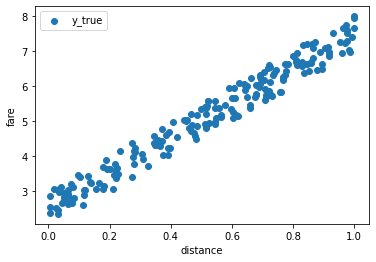

In [12]:
plt.scatter(x=taxi_fare_data['distance'], y=taxi_fare_data['fare'], label='y_true')
plt.legend()
plt.xlabel('distance')
plt.ylabel('fare')

## Wrap everything into a function

In [13]:
def linear_eqn_gradient_descent(x, y_true, lr=0.1, num_epochs=500):   
    # Plot the ground truth
    plt.scatter(x['distance'], y_true, label='y_true')
    
    # Step0: Randomly assign starting parameters
    a = random.random(2)

    for epoch in range(num_epochs+1):
        # Step1: Matrix Multiplication to calculate y_pred
        y_pred = np.matmul(x.values, a)

        # Step2: Loss Calculation
        mse = np.mean((y_true - y_pred)**2)

        # Step3: Gradient: Calculate Partial Derivatives
        pd_a1 = np.mean(-2*x['distance']*(y_true - y_pred))
        pd_a0 = np.mean(-2*x['intercept']*(y_true - y_pred))

        # Step4: Descent: Updating the parameters in the direction of lowering the Loss
        a[1] = a[1] - lr*pd_a1
        a[0] = a[0] - lr*pd_a0

        if epoch%100 == 0:
            # Plot the line on every 100th trial
            plt.scatter(x['distance'], y_pred, label=epoch)

        # Step5: Repeat from Step1
    plt.legend()
    plt.xlabel('distance')
    plt.ylabel('fare')
    print('Final MSE = ', mse)

Final MSE =  0.07759749008986103


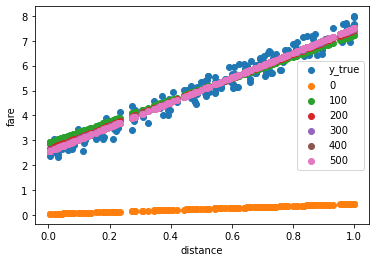

In [14]:
linear_eqn_gradient_descent(x=taxi_fare_data[['intercept', 'distance']], y_true=taxi_fare_data['fare'])

Final MSE =  0.17615363816868393


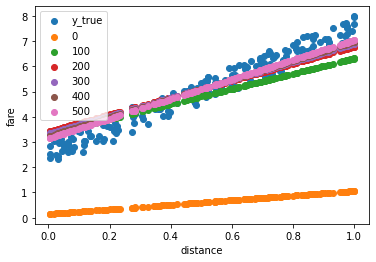

In [15]:
linear_eqn_gradient_descent(x=taxi_fare_data[['intercept', 'distance']], y_true=taxi_fare_data['fare'], lr=0.01)

Final MSE =  9.698437287401462e+202


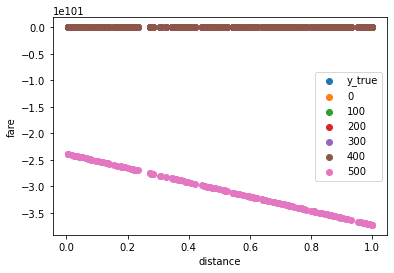

In [16]:
linear_eqn_gradient_descent(x=taxi_fare_data[['intercept', 'distance']], y_true=taxi_fare_data['fare'], lr=1)

## Non-Linearities

In [17]:
# ReLU in numpy
x = [30, -32]
relu = np.maximum(0, x)
print(relu)

[30  0]


In [18]:
# Softmax in numpy
x = [30, 32]
softmax = np.exp(x) / np.sum(np.exp(x))
print(softmax)

[0.11920292 0.88079708]


## Categorical Cross Entropy Loss

In [19]:
# Categorical Crossentropy Loss in numpy
y_true = [0, 1]
y_pred = softmax
cce_loss = -np.sum(y_true * np.log10(y_pred))
print(cce_loss)

0.05512413479491803
